In [11]:
import pandas as pd

raw_covid = pd.read_csv('./data/covid.csv', dtype={'datacommons_id': str})

selected_fields = ['date', 'new_confirmed', 'new_recovered', 'cumulative_confirmed', 'cumulative_recovered']
selected_covid = raw_covid[selected_fields]

truncated_covid = selected_covid.head(283);

truncated_covid['new_recovered'] = truncated_covid['new_recovered'].fillna(0)
truncated_covid['cumulative_recovered'] = truncated_covid['cumulative_recovered'].fillna(0)

truncated_covid.to_csv('./Stage2/covid.csv', index=False)

<ipython-input-11-b3d1071a5684>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated_covid['new_recovered'] = truncated_covid['new_recovered'].fillna(0)
<ipython-input-11-b3d1071a5684>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  truncated_covid['cumulative_recovered'] = truncated_covid['cumulative_recovered'].fillna(0)


In [12]:
import pandas as pd

raw_govcanhealth = pd.read_csv('./data/govcanhealth.csv')
raw_cdcgov = pd.read_csv('./data/cdcgov.csv')
raw_cbcnews = pd.read_csv('./data/cbcnews.csv')
raw_globalnews = pd.read_csv('./data/globalnews.csv')

selected_fields = ['date', 'tweet', 'hashtags',]
selected_govcanhealth = raw_govcanhealth[selected_fields]
selected_cdcgov = raw_cdcgov[selected_fields]
selected_cbcnews = raw_cbcnews[selected_fields]
selected_globalnews = raw_globalnews[selected_fields]

selected_govcanhealth['date'] = pd.to_datetime(selected_govcanhealth['date'])
selected_cdcgov['date'] = pd.to_datetime(selected_cdcgov['date'])
selected_cbcnews['date'] = pd.to_datetime(selected_cbcnews['date'])
selected_globalnews['date'] = pd.to_datetime(selected_globalnews['date'])

start_date = '11-01-2019'
end_date = '10-09-2020'
mask_govcanhealth = (selected_govcanhealth['date'] >= start_date) & (selected_govcanhealth['date'] <= end_date)
mask_cdcgov = (selected_cdcgov['date'] >= start_date) & (selected_cdcgov['date'] <= end_date)
mask_cbcnews = (selected_cbcnews['date'] >= start_date) & (selected_cbcnews['date'] <= end_date)
mask_globalnews = (selected_globalnews['date'] >= start_date) & (selected_globalnews['date'] <= end_date)

truncated_govcanhealth = selected_govcanhealth.loc[mask_govcanhealth]
truncated_cdcgov = selected_cdcgov.loc[mask_cdcgov]
truncated_cbcnews = selected_cbcnews.loc[mask_cbcnews]
truncated_globalnews = selected_globalnews.loc[mask_globalnews]

truncated_govcanhealth.to_csv('./Stage2/govcanhealth.csv', index=False)
truncated_cdcgov.to_csv('./Stage2/cdcgov.csv', index=False)
truncated_cbcnews.to_csv('./Stage2/cbcnews.csv', index=False)
truncated_globalnews.to_csv('./Stage2/globalnews.csv', index=False)

<ipython-input-12-fb08c914852e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_govcanhealth['date'] = pd.to_datetime(selected_govcanhealth['date'])
<ipython-input-12-fb08c914852e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_cdcgov['date'] = pd.to_datetime(selected_cdcgov['date'])
<ipython-input-12-fb08c914852e>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [13]:
import pandas as pd

raw_govcanhealth = pd.read_csv('./Stage2/govcanhealth.csv')
raw_cdcgov = pd.read_csv('./Stage2/cdcgov.csv')
raw_cbcnews = pd.read_csv('./Stage2/cbcnews.csv')
raw_globalnews = pd.read_csv('./Stage2/globalnews.csv')

keywords = ['covid', 'physicaldistancing', 'publichealth', 'coronavirus', 'pandemic', 'mask']
pattern = '|'.join(keywords)

filtered_govcanhealth = raw_govcanhealth[raw_govcanhealth['tweet'].str.contains(pattern, case=False)]
filtered_cdcgov = raw_cdcgov[raw_cdcgov['tweet'].str.contains(pattern, case=False)]
filtered_cbcnews = raw_cbcnews[raw_cbcnews['tweet'].str.contains(pattern, case=False)]
filtered_globalnews = raw_globalnews[raw_globalnews['tweet'].str.contains(pattern, case=False)]

filtered_govcanhealth.to_csv('./Stage3/govcanhealth.csv', index=False)
filtered_cdcgov.to_csv('./Stage3/cdcgov.csv', index=False)
filtered_cbcnews.to_csv('./Stage3/cbcnews.csv', index=False)
filtered_globalnews.to_csv('./Stage3/globalnews.csv', index=False)

In [35]:
import pandas as pd
from datetime import timedelta

covid = pd.read_csv('./Stage2/covid.csv')
govcanhealth = pd.read_csv('./Stage3/govcanhealth.csv')
cdcgov = pd.read_csv('./Stage3/cdcgov.csv')
cbcnews = pd.read_csv('./Stage3/cbcnews.csv')
globalnews = pd.read_csv('./Stage3/globalnews.csv')

covid['date'] = pd.to_datetime(covid['date'])
govcanhealth['date'] = pd.to_datetime(govcanhealth['date'])
cdcgov['date'] = pd.to_datetime(cdcgov['date'])
cbcnews['date'] = pd.to_datetime(cbcnews['date'])
globalnews['date'] = pd.to_datetime(globalnews['date'])

start_date = '01-01-2020'
end_date = '10-08-2020'
mask_govcanhealth = (govcanhealth['date'] >= start_date) & (govcanhealth['date'] <= end_date)
mask_cdcgov = (cdcgov['date'] >= start_date) & (cdcgov['date'] <= end_date)
mask_cbcnews = (cbcnews['date'] >= start_date) & (cbcnews['date'] <= end_date)
mask_globalnews = (globalnews['date'] >= start_date) & (globalnews['date'] <= end_date)
mask_covid = (covid['date'] >= start_date) & (covid['date'] <= end_date)
govcanhealth = govcanhealth.loc[mask_govcanhealth]
cdcgov = cdcgov.loc[mask_cdcgov]
cbcnews = cbcnews.loc[mask_cbcnews]
globalnews = globalnews.loc[mask_globalnews]
covid1 = covid.loc[mask_covid]
column_names = ['date', 'tweet', 'hashtags', 'account', 'Mylabel']
column_Covidnames = ['date','Changes']
data = pd.DataFrame(columns=column_names)
coviddata = pd.DataFrame(columns=column_Covidnames)
counter = 0
CovidDay= 0

print(covid1)

for index, row in covid1.iterrows():
    next_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date'] + timedelta(days=1)].values[0]
    same_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date']].values[0]

    coviddata.loc[CovidDay] = row
    coviddata.loc[CovidDay, 'Changes'] = next_day_cases - same_day_cases

    CovidDay = CovidDay + 1

for index, row in govcanhealth.iterrows():
    next_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date'] + timedelta(days=1)].values[0]
    same_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date']].values[0]

    data.loc[counter] = row
    data.loc[counter, 'account'] = 'govcanhealth'
    if next_day_cases - same_day_cases > 50:
        data.loc[counter, 'Mylabel'] = 'increas'
    elif next_day_cases - same_day_cases < -50:
        data.loc[counter, 'Mylabel'] = 'decreas'
    else:
         data.loc[counter, 'Mylabel'] = 'NoChange'
    counter = counter + 1


for index, row in cdcgov.iterrows():
    next_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date'] + timedelta(days=1)].values[0]
    same_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date']].values[0]

    data.loc[counter] = row
    data.loc[counter, 'account'] = 'cdcgov'
    if next_day_cases - same_day_cases > 50:
        data.loc[counter, 'Mylabel'] = 'increas'
    elif next_day_cases - same_day_cases < -50:
        data.loc[counter, 'Mylabel'] = 'decreas'
    else:
        data.loc[counter, 'Mylabel'] = 'NoChange'

    counter = counter + 1

for index, row in cbcnews.iterrows():
    next_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date'] + timedelta(days=1)].values[0]
    same_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date']].values[0]

    data.loc[counter] = row
    data.loc[counter, 'account'] = 'cbcnews'

    if next_day_cases - same_day_cases > 50:
        data.loc[counter, 'Mylabel'] = 'increas'
    elif next_day_cases - same_day_cases < -50:
        data.loc[counter, 'Mylabel'] = 'decreas'
    else:
        data.loc[counter, 'Mylabel'] = 'NoChange'

    counter = counter + 1

for index, row in globalnews.iterrows():
    next_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date'] + timedelta(days=1)].values[0]
    same_day_cases = covid['new_confirmed'].loc[covid['date'] == row['date']].values[0]

    data.loc[counter] = row
    data.loc[counter, 'account'] = 'globalnews'

    if next_day_cases - same_day_cases > 50:
        data.loc[counter, 'Mylabel'] = 'increas'
    elif next_day_cases - same_day_cases < -50:
        data.loc[counter, 'Mylabel'] = 'decreas'
    else:
        data.loc[counter, 'Mylabel'] = 'NoChange'

    counter = counter + 1

data.to_csv('./Dataset/data1day.csv', index=False)
coviddata.to_csv('./Dataset/covid1day.csv', index=False)

          date  new_confirmed  new_recovered  cumulative_confirmed  \
0   2020-01-01            0.0            0.0                   0.0   
1   2020-01-02            0.0            0.0                   0.0   
2   2020-01-03            0.0            0.0                   0.0   
3   2020-01-04            0.0            0.0                   0.0   
4   2020-01-05            0.0            0.0                   0.0   
..         ...            ...            ...                   ...   
277 2020-10-04         1685.0         1376.0              166156.0   
278 2020-10-05         2804.0         2091.0              168960.0   
279 2020-10-06         2363.0         1660.0              171323.0   
280 2020-10-07         1800.0         1672.0              173123.0   
281 2020-10-08         2436.0         1842.0              175559.0   

     cumulative_recovered  
0                     0.0  
1                     0.0  
2                     0.0  
3                     0.0  
4                  

In [36]:
import pandas as pd
from datetime import timedelta

covid = pd.read_csv('./Stage2/covid.csv')
govcanhealth = pd.read_csv('./Stage3/govcanhealth.csv')
cdcgov = pd.read_csv('./Stage3/cdcgov.csv')
cbcnews = pd.read_csv('./Stage3/cbcnews.csv')
globalnews = pd.read_csv('./Stage3/globalnews.csv')


covid['date'] = pd.to_datetime(covid['date'])
govcanhealth['date'] = pd.to_datetime(govcanhealth['date'])
cdcgov['date'] = pd.to_datetime(cdcgov['date'])
cbcnews['date'] = pd.to_datetime(cbcnews['date'])
globalnews['date'] = pd.to_datetime(globalnews['date'])

start_date = '01-01-2020'
end_date = '09-25-2020'
mask_govcanhealth = (govcanhealth['date'] >= start_date) & (govcanhealth['date'] <= end_date)
mask_cdcgov = (cdcgov['date'] >= start_date) & (cdcgov['date'] <= end_date)
mask_cbcnews = (cbcnews['date'] >= start_date) & (cbcnews['date'] <= end_date)
mask_globalnews = (globalnews['date'] >= start_date) & (globalnews['date'] <= end_date)
covid_mask = (covid['date'] >= start_date) & (covid['date'] <= end_date)
govcanhealth = govcanhealth.loc[mask_govcanhealth]
cdcgov = cdcgov.loc[mask_cdcgov]
cbcnews = cbcnews.loc[mask_cbcnews]
globalnews = globalnews.loc[mask_globalnews]
covid1 = covid.loc[covid_mask]
column_names = ['date', 'tweet', 'hashtags', 'account']
column_Covidnames = ['date','Changes']
data = pd.DataFrame(columns=column_names)
coviddata = pd.DataFrame(columns=column_Covidnames)
counter = 0
CovidDay= 0



def next_14_cases(date):
    addition = 0
    for i in range(14):
        addition = addition + covid['new_confirmed'].loc[covid['date'] == date + timedelta(days=i+1)].values[0]

    return addition


def Current_case(date):
    addition = 0
    
    addition =  covid['new_confirmed'].loc[covid['date'] == date - timedelta(days=0)].values[0]

    return addition


for index, row in covid1.iterrows():
    next_cases = next_14_cases(row['date'])
    previous_cases = Current_case(row['date'])
    coviddata.loc[CovidDay] = row
    coviddata.loc[CovidDay, 'Changes'] = next_cases/14 - previous_cases

    CovidDay = CovidDay + 1
    

for index, row in govcanhealth.iterrows():
    next_cases = next_14_cases(row['date'])
    previous_cases = Current_case(row['date'])

    data.loc[counter] = row
    data.loc[counter, 'account'] = 'govcanhealth'

    if next_cases/14 - previous_cases > 50:
        data.loc[counter, 'Mylabel'] = 'increas'
    elif next_cases/14 - previous_cases < -50:
        data.loc[counter, 'Mylabel'] = 'decreas'
    else:
        data.loc[counter, 'Mylabel'] = 'NoChange'

    counter = counter + 1


for index, row in cdcgov.iterrows():
    next_cases = next_14_cases(row['date'])
    previous_cases = Current_case(row['date'])

    data.loc[counter] = row
    data.loc[counter, 'account'] = 'cdcgov'

    if next_cases/14 - previous_cases > 50:
        data.loc[counter, 'Mylabel'] = 'increas'
    elif next_cases/14 - previous_cases < -50:
        data.loc[counter, 'Mylabel'] = 'decreas'
    else:
        data.loc[counter, 'Mylabel'] = 'NoChange'

    counter = counter + 1

for index, row in cbcnews.iterrows():
    next_cases = next_14_cases(row['date'])
    previous_cases = Current_case(row['date'])

    data.loc[counter] = row
    data.loc[counter, 'account'] = 'cbcnews'

    if next_cases/14 - previous_cases > 50:
        data.loc[counter, 'Mylabel'] = 'increas'
    elif next_cases/14 - previous_cases < -50:
        data.loc[counter, 'Mylabel'] = 'decreas'
    else:
        data.loc[counter, 'Mylabel'] = 'NoChange'

    counter = counter + 1

for index, row in globalnews.iterrows():
    next_cases = next_14_cases(row['date'])
    previous_cases = Current_case(row['date'])

    data.loc[counter] = row
    data.loc[counter, 'account'] = 'globalnews'

    if next_cases/14 - previous_cases > 50:
        data.loc[counter, 'Mylabel'] = 'increas'
    elif next_cases/14 - previous_cases < -50:
        data.loc[counter, 'Mylabel'] = 'decreas'
    else:
        data.loc[counter, 'Mylabel'] = 'NoChange'

    counter = counter + 1

data.to_csv('./Dataset/data14day.csv', index=False)

coviddata.to_csv('./Dataset/Covid14day.csv', index=False)

In [37]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans14 = KMeans(n_clusters=3, random_state=0)
file = 'Dataset/covid1day.csv'
file14 = 'Dataset/covid14day.csv'
data_df14 = pd.read_csv(file14)
data_df = pd.read_csv(file)
data_Change14 = data_df14['Changes']
data_Change = data_df['Changes']
scaler14 = MinMaxScaler()
scaler = MinMaxScaler()
scaler.fit(data_Change.to_numpy().reshape(-1,1))
scaler14.fit(data_Change14.to_numpy().reshape(-1,1))
normalized_Change = scaler.transform(data_Change.to_numpy().reshape(-1,1))
normalized_Change14 = scaler14.transform(data_Change14.to_numpy().reshape(-1,1))
data_df14['NormalChange'] =normalized_Change14
data_df['NormalChange'] =normalized_Change

data_df14



,date,Changes,NormalChange
0,2020-01-01,0.000000,0.625485
1,2020-01-02,0.000000,0.625485
2,2020-01-03,0.000000,0.625485
3,2020-01-04,0.000000,0.625485
4,2020-01-05,0.000000,0.625485
...,...,...,...
264,2020-09-21,-84.214286,0.590555
265,2020-09-22,513.428571,0.838444
266,2020-09-23,722.142857,0.925014
267,2020-09-24,549.357143,0.853346


In [38]:
data_df

,date,Changes,NormalChange
0,2020-01-01,0.0,0.518256
1,2020-01-02,0.0,0.518256
2,2020-01-03,0.0,0.518256
3,2020-01-04,0.0,0.518256
4,2020-01-05,0.0,0.518256
...,...,...,...
277,2020-10-04,1119.0,0.914924
278,2020-10-05,-441.0,0.361928
279,2020-10-06,-563.0,0.318681
280,2020-10-07,636.0,0.743708


In [39]:

from collections import Counter 
preds = kmeans.fit_predict(data_df['NormalChange'].to_numpy().reshape(-1,1))
preds14 = kmeans14.fit_predict(data_df14['NormalChange'].to_numpy().reshape(-1,1))


In [40]:
centroids14 = kmeans14.cluster_centers_
centroids = kmeans.cluster_centers_
print('centroids for 1 days')
print(centroids)
print('centroids for 14 days')
print(centroids14)

centroids for 1 days
[[0.51880838]
 [0.74148853]
 [0.36271332]]
centroids for 14 days
[[0.506748  ]
 [0.63974867]
 [0.82060081]]


In [41]:
data_df['Label'] =preds
data_df.to_csv('./Dataset/FulDataset1day.csv', index=False)
data_df14['Label'] =preds14
data_df14.to_csv('./Dataset/FulDataset14day.csv', index=False)

In [44]:
import pandas as pd
from datetime import timedelta

covid = pd.read_csv('./Dataset/FulDataset1day.csv')
Data = pd.read_csv('./Dataset/data1day.csv')

covid['date'] = pd.to_datetime(covid['date'])
Data['date'] = pd.to_datetime(Data['date'])
column_names = ['date', 'tweet', 'hashtags', 'account', 'Mylabel']
FullDataSet = pd.DataFrame(columns=column_names)
dataModel = pd.DataFrame(columns=column_names)
dataApply = pd.DataFrame(columns=column_names)
dataValidate = pd.DataFrame(columns=column_names)
counter = 0

dataset = Data
start_date = pd.to_datetime('01-01-2020')
firstend_date = pd.to_datetime('08-01-2020')
second_date = pd.to_datetime('08-02-2020')
secondend_date = pd.to_datetime('09-01-2020')
valstart_date = pd.to_datetime('09-02-2020')
end_date = pd.to_datetime('10-08-2020')
dataset['date'] = pd.to_datetime(dataset['date'])
for index, row in dataset.iterrows():
    
    label = covid['Label'].loc[covid['date'] == row['date']].values[0]

    if  row['date'] >= start_date and row['date'] <= firstend_date:
        dataModel.loc[counter] = row
        FullDataSet.loc[counter] = row
        if label == 1:
            dataModel.loc[counter, 'label'] = 'increase'
            FullDataSet.loc[counter, 'label'] = 'increase'
        elif label == 0:
            dataModel.loc[counter, 'label'] = 'equal'
            FullDataSet.loc[counter, 'label'] = 'equal'
        else:
            dataModel.loc[counter, 'label'] = 'decrease'
            FullDataSet.loc[counter, 'label'] = 'decrease'
    elif row['date'] >= second_date and  row['date'] <= secondend_date:
        dataApply.loc[counter] = row
        FullDataSet.loc[counter] = row
        if label == 1:
            dataApply.loc[counter, 'label'] = 'increase'
            FullDataSet.loc[counter, 'label'] = 'increase'
        elif label == 0:
            dataApply.loc[counter, 'label'] = 'equal'
            FullDataSet.loc[counter, 'label'] = 'equal'
        else:
            dataApply.loc[counter, 'label'] = 'decrease'
            FullDataSet.loc[counter, 'label'] = 'decrease'
    else:
        dataValidate.loc[counter] = row
        FullDataSet.loc[counter] = row
        if label == 1:
            dataValidate.loc[counter, 'label'] = 'increase'
            FullDataSet.loc[counter, 'label'] = 'increase'
        elif label == 0:
            dataValidate.loc[counter, 'label'] = 'equal'
            FullDataSet.loc[counter, 'label'] = 'equal'
        else:
            dataValidate.loc[counter, 'label'] = 'decrease'
            FullDataSet.loc[counter, 'label'] = 'decrease'

    counter = counter + 1
FullDataSet.to_csv('./ModelDataset/FullModelDay1.csv', index=False)
dataModel.to_csv('./ModelDataset/data1dayModel.csv', index=False)
dataApply.to_csv('./ModelDataset/data1dayApply.csv', index=False)
dataValidate.to_csv('./ModelDataset/data1dayValidate.csv', index=False)

In [68]:
import pandas as pd
from datetime import timedelta

covid = pd.read_csv('./Dataset/FulDataset14day.csv')
Data = pd.read_csv('./Dataset/data14day.csv')

covid['date'] = pd.to_datetime(covid['date'])
Data['date'] = pd.to_datetime(Data['date'])

column_names = ['date', 'tweet', 'hashtags', 'account', 'Mylabel']
FullDataSet14 = pd.DataFrame(columns=column_names)
dataModel14 = pd.DataFrame(columns=column_names)
dataApply14 = pd.DataFrame(columns=column_names)
dataValidate14 = pd.DataFrame(columns=column_names)
counter = 0

dataset = Data
start_date = pd.to_datetime('01-01-2020')
firstend_date = pd.to_datetime('08-01-2020')
second_date = pd.to_datetime('08-02-2020')
secondend_date = pd.to_datetime('09-01-2020')
dataset['date'] = pd.to_datetime(dataset['date'])
for index, row in dataset.iterrows():
    
    label = covid['Label'].loc[covid['date'] == row['date']].values[0]
    FullDataSet14.loc[counter] = row
    if label == 1:
        FullDataSet14.loc[counter, 'label'] = 'increase'
    elif label == 0:
        FullDataSet14.loc[counter, 'label'] = 'equal'
    else:
        FullDataSet14.loc[counter, 'label'] = 'decrease'

    if  row['date'] >= start_date and row['date'] <= firstend_date:
        dataModel14.loc[counter] = row
       
        if label == 1:
            dataModel14.loc[counter, 'label'] = 'increase'
        elif label == 0:
            dataModel14.loc[counter, 'label'] = 'equal'
        else:
            dataModel14.loc[counter, 'label'] = 'decrease'
    elif row['date'] >= second_date and  row['date'] <= secondend_date:
        dataApply14.loc[counter] = row
        if label == 1:
            dataApply14.loc[counter, 'label'] = 'increase'
        elif label == 0:
            dataApply14.loc[counter, 'label'] = 'equal'
        else:
            dataApply14.loc[counter, 'label'] = 'decrease'
    else:
        dataValidate14.loc[counter] = row
        if label == 1:
            dataValidate14.loc[counter, 'label'] = 'increase'
        elif label == 0:
            dataValidate14.loc[counter, 'label'] = 'equal'
        else:
            dataValidate14.loc[counter, 'label'] = 'decrease'

    counter = counter + 1
FullDataSet14.to_csv('./ModelDataset/FullModel14.csv', index=False)
dataModel14.to_csv('./ModelDataset/data14dayModel.csv', index=False)
dataApply14.to_csv('./ModelDataset/data14dayApply.csv', index=False)
dataValidate14.to_csv('./ModelDataset/dataday14Validate.csv', index=False)

In [69]:
import os
import re
import pandas as pd
import nltk
from nltk import tokenize
nltk.download('punkt')
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import TfidfVectorizer


stop_words = set(stopwords.words('english'))
file = './ModelDataset/FullModelDay1.csv'
filemodel = './ModelDataset/data1dayModel.csv'
filevalidate= './ModelDataset/data1dayApply.csv'
filetest= './ModelDataset/data1dayValidate.csv'
data_df = pd.read_csv(file, header=0)
data_model = pd.read_csv(filemodel, header=0)
data_test = pd.read_csv(filetest, header=0)
data_validate = pd.read_csv(filevalidate, header=0)

file14 = './ModelDataset/FullModel14.csv'
filemodel14 = './ModelDataset/data14dayModel.csv'
filevalidate14= './ModelDataset/data14dayApply.csv'
filetest14= './ModelDataset/dataday14Validate.csv'
data_df14 = pd.read_csv(file14, header=0)
data_model14 = pd.read_csv(filemodel14, header=0)
data_test14 = pd.read_csv(filetest14, header=0)
data_validate14 = pd.read_csv(filevalidate14, header=0)

vectorizer = TfidfVectorizer(token_pattern=r'(?u)\b\w+\b', ngram_range=(1, 1),)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\reza\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reza\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
df = data_df[['tweet','label']] 
df_train = data_model[['tweet','label']] 
df_test= data_test[['tweet','label']] 
df_validate= data_validate[['tweet','label']] 


df14 = data_df14[['tweet','label']] 
df_train14 = data_model14[['tweet','label']] 
df_test14= data_test14[['tweet','label']] 
df_validate14= data_validate14[['tweet','label']]

In [71]:
def cleaning(Data):
    Data = Data.rstrip('\n')
    Data = Data.rstrip('\t')
    Data = re.sub('<[^<]+?>', '', Data)
    Data = re.sub(r'\d+', '', Data)
    Data = re.sub('[^0-9a-zA-Z\w.]', ' ', Data)
    Data = re.sub('\s+', ' ', Data, flags=re.I)
    Data = re.sub('\.\.+', ' ', Data)
    DataReturn = ""
    token = tokenize.sent_tokenize(Data)
    for j in range(len(token)):
        s = tokenize.word_tokenize(token[j])
        clean_word = [
            w.lower() for w in s
            if w.lower() not in stop_words and w.isalnum() and len(w)>2
        ]
        DataReturn = DataReturn + ' '.join(clean_word) + ' . '
    return DataReturn


In [72]:
articles = []
n = df.shape[0]
data_cleaned = df.copy()
for i in range(n):
    temp = cleaning(df.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_cleaned.loc[:, 'tweet'] = pd.Series(articles, index=data_df.index)

articles = []
n = df_train.shape[0]
data_train_cleaned = df_train.copy()
for i in range(n):
    temp = cleaning(df_train.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_train_cleaned.loc[:, 'tweet'] = pd.Series(articles, index=data_model.index)

articles = []
n = df_test.shape[0]
data_test_cleaned = df_test.copy()
for i in range(n):
    temp = cleaning(df_test.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_test_cleaned.loc[:, 'tweet'] = pd.Series(articles, index=data_test.index)

articles = []
n = df_validate.shape[0]
data_validate_cleaned = df_validate.copy()
for i in range(n):
    temp = cleaning(df_validate.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_validate_cleaned.loc[:, 'tweet'] = pd.Series(articles, index=data_validate.index)


# Un-comment the following codes when the label is available
#data_cleaned.loc[:, 'Category'] = pd.Categorical(data_cleaned.label)
#data_cleaned['code'] = data_cleaned.Category.cat.codes

#category_to_code = dict(enumerate(data_cleaned['Category'].cat.categories))

All 11384 articles are cleaned.
All 9380 articles are cleaned.
All 1081 articles are cleaned.
All 923 articles are cleaned.


In [74]:
articles = []
n = df14.shape[0]
data_cleaned14 = df14.copy()
for i in range(n):
    temp = cleaning(df14.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_cleaned14.loc[:, 'tweet'] = pd.Series(articles, index=data_df14.index)

articles = []
n = df_train14.shape[0]
data_train_cleaned14 = df_train14.copy()
for i in range(n):
    temp = cleaning(df_train14.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_train_cleaned14.loc[:, 'tweet'] = pd.Series(articles, index=data_model14.index)

articles = []
n = df_test14.shape[0]
data_test_cleaned14 = df_test14.copy()
for i in range(n):
    temp = cleaning(df_test14.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_test_cleaned14.loc[:, 'tweet'] = pd.Series(articles, index=data_test14.index)

articles = []
n = df_validate14.shape[0]
data_validate_cleaned14 = df_validate14.copy()
for i in range(n):
    temp = cleaning(df_validate14.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_validate_cleaned14.loc[:, 'tweet'] = pd.Series(articles, index=data_validate14.index)

All 11022 articles are cleaned.
All 9380 articles are cleaned.
All 719 articles are cleaned.
All 923 articles are cleaned.


In [75]:
data_validate_cleaned14

,tweet,label
0,live federal health officials provide covid up...,increase
1,canborder arrive canada amp started day mandat...,increase
2,canborder emergency order requires persons ent...,increase
3,canborder arrive canada amp started day mandat...,increase
4,canborder emergency order requires persons ent...,increase
...,...,...
918,commentary discomfort wearing masks midst pand...,increase
919,tropical storm isaias approaches coronavirus h...,increase
920,according health canada without guidance healt...,increase
921,like teachers experts worry effect pandemic ki...,increase


In [76]:
vectors = vectorizer.fit(data_cleaned['tweet'])

In [77]:
train_vectors= vectors.transform(data_train_cleaned['tweet'])
test_vectors= vectors.transform(data_test_cleaned['tweet'])
validate_vectors= vectors.transform(data_validate_cleaned['tweet'])

In [78]:
train_vectors14= vectors.transform(data_train_cleaned14['tweet'])
test_vectors14= vectors.transform(data_test_cleaned14['tweet'])
validate_vectors14= vectors.transform(data_validate_cleaned14['tweet'])

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = [
         "Decision Tree", "Random Forest", "Naive Bayes"
         ]
classifiers = [
    
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=14, n_estimators=40, max_features=1),
    GaussianNB()
    ]
valid_scores= []
day1_test_scores = []
day14_test_scores = []

 

for name, clf in zip(names, classifiers):
    
    clf.fit(train_vectors.toarray(), data_train_cleaned['label'])
    valid_scores.append(clf.score(validate_vectors.toarray(), data_validate_cleaned['label']))
    day1_test_scores.append(clf.score(test_vectors.toarray(), data_test_cleaned['label']))
    day14_test_scores.append(clf.score(test_vectors14.toarray(), data_test_cleaned14['label']))
    
    
 

In [86]:
valid_scores

[0.6782231852654388, 0.6803900325027086, 0.5330444203683641]

In [87]:
day1_test_scores

[0.61054579093432, 0.6114708603145236, 0.5180388529139686]

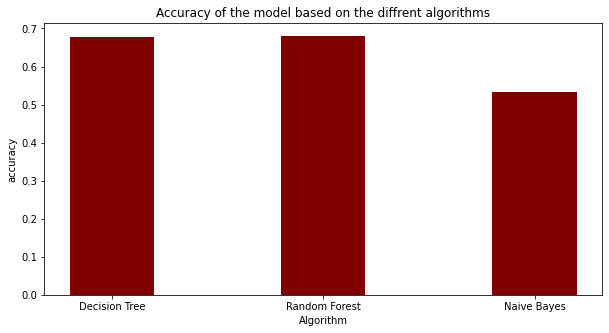

In [88]:
import numpy as np 
import matplotlib.pyplot as plt  
  
   
 
Tags = list(names) 
values = list(valid_scores) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(Tags, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Algorithm") 
plt.ylabel("accuracy") 
plt.title("Accuracy of the model based on the diffrent algorithms") 
plt.show() 


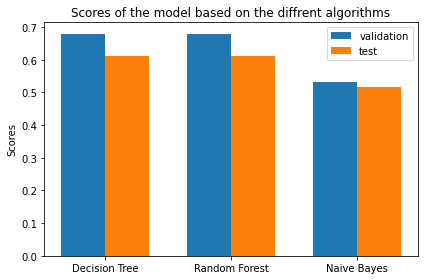

In [89]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = names


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, valid_scores, width, label='validation')
rects2 = ax.bar(x + width/2, day1_test_scores, width, label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of the model based on the diffrent algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')




fig.tight_layout()

plt.show()

In [18]:
#we Chose random forest based on the scores that we recived


In [100]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02 

names = [
         "Decision Tree", "Random Forest", "Naive Bayes"
         ]
classifiers = [
    
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=8, n_estimators=20, max_features=1),
    GaussianNB()
    ]
valid_scores14= []
day14_test_scores = []


 

for name, clf in zip(names, classifiers):
    
    clf.fit(train_vectors14.toarray(), data_train_cleaned14['label'])
    valid_scores14.append(clf.score(validate_vectors14.toarray(), data_validate_cleaned14['label']))
    day14_test_scores.append(clf.score(test_vectors14.toarray(), data_test_cleaned14['label']))

In [101]:
valid_scores14

[0.7908992416034669, 0.7919826652221018, 0.3412784398699892]

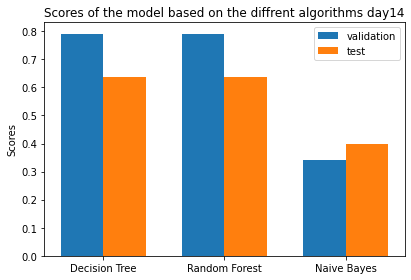

In [104]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = names


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, valid_scores14, width, label='validation')
rects2 = ax.bar(x + width/2, day14_test_scores, width, label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of the model based on the diffrent algorithms day14')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')




fig.tight_layout()

plt.show()

In [105]:
#Now Based On our tags we are running and create two models

In [106]:
df = data_df[['tweet','Mylabel']] 
df_train = data_model[['tweet','Mylabel']] 
df_test= data_test[['tweet','Mylabel']] 
df_validate= data_validate[['tweet','Mylabel']] 


df14 = data_df14[['tweet','Mylabel']] 
df_train14 = data_model14[['tweet','Mylabel']] 
df_test14= data_test14[['tweet','Mylabel']] 
df_validate14= data_validate14[['tweet','Mylabel']]


In [107]:
def cleaning(Data):
    Data = Data.rstrip('\n')
    Data = Data.rstrip('\t')
    Data = re.sub('<[^<]+?>', '', Data)
    Data = re.sub(r'\d+', '', Data)
    Data = re.sub('[^0-9a-zA-Z\w.]', ' ', Data)
    Data = re.sub('\s+', ' ', Data, flags=re.I)
    Data = re.sub('\.\.+', ' ', Data)
    DataReturn = ""
    token = tokenize.sent_tokenize(Data)
    for j in range(len(token)):
        s = tokenize.word_tokenize(token[j])
        clean_word = [
            w.lower() for w in s
            if w.lower() not in stop_words and w.isalnum() and len(w)>2
        ]
        DataReturn = DataReturn + ' '.join(clean_word) + ' . '
    return DataReturn


In [108]:
articles = []
n = df.shape[0]
data_cleaned = df.copy()
for i in range(n):
    temp = cleaning(df.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_cleaned.loc[:, 'tweet'] = pd.Series(articles, index=data_df.index)

articles = []
n = df_train.shape[0]
data_train_cleaned = df_train.copy()
for i in range(n):
    temp = cleaning(df_train.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_train_cleaned.loc[:, 'tweet'] = pd.Series(articles, index=data_model.index)

articles = []
n = df_test.shape[0]
data_test_cleaned = df_test.copy()
for i in range(n):
    temp = cleaning(df_test.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_test_cleaned.loc[:, 'tweet'] = pd.Series(articles, index=data_test.index)

articles = []
n = df_validate.shape[0]
data_validate_cleaned = df_validate.copy()
for i in range(n):
    temp = cleaning(df_validate.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_validate_cleaned.loc[:, 'tweet'] = pd.Series(articles, index=data_validate.index)


# Un-comment the following codes when the label is available
#data_cleaned.loc[:, 'Category'] = pd.Categorical(data_cleaned.label)
#data_cleaned['code'] = data_cleaned.Category.cat.codes

#category_to_code = dict(enumerate(data_cleaned['Category'].cat.categories))

All 11384 articles are cleaned.
All 9380 articles are cleaned.
All 1081 articles are cleaned.
All 923 articles are cleaned.


In [109]:
articles = []
n = df14.shape[0]
data_cleaned14 = df14.copy()
for i in range(n):
    temp = cleaning(df14.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_cleaned14.loc[:, 'tweet'] = pd.Series(articles, index=data_df14.index)

articles = []
n = df_train14.shape[0]
data_train_cleaned14 = df_train14.copy()
for i in range(n):
    temp = cleaning(df_train14.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_train_cleaned14.loc[:, 'tweet'] = pd.Series(articles, index=data_model14.index)

articles = []
n = df_test14.shape[0]
data_test_cleaned14 = df_test14.copy()
for i in range(n):
    temp = cleaning(df_test14.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_test_cleaned14.loc[:, 'tweet'] = pd.Series(articles, index=data_test14.index)

articles = []
n = df_validate14.shape[0]
data_validate_cleaned14 = df_validate14.copy()
for i in range(n):
    temp = cleaning(df_validate14.iloc[i]['tweet'])
    articles.append(temp)
print("All {} articles are cleaned.".format(n))
data_validate_cleaned14.loc[:, 'tweet'] = pd.Series(articles, index=data_validate14.index)

All 11022 articles are cleaned.
All 9380 articles are cleaned.
All 719 articles are cleaned.
All 923 articles are cleaned.


In [110]:
data_validate_cleaned14

,tweet,Mylabel
0,live federal health officials provide covid up...,increas
1,canborder arrive canada amp started day mandat...,increas
2,canborder emergency order requires persons ent...,increas
3,canborder arrive canada amp started day mandat...,increas
4,canborder emergency order requires persons ent...,increas
...,...,...
918,commentary discomfort wearing masks midst pand...,increas
919,tropical storm isaias approaches coronavirus h...,increas
920,according health canada without guidance healt...,increas
921,like teachers experts worry effect pandemic ki...,increas


In [111]:
vectors = vectorizer.fit(data_cleaned['tweet'])

In [112]:
train_vectors= vectors.transform(data_train_cleaned['tweet'])
test_vectors= vectors.transform(data_test_cleaned['tweet'])
validate_vectors= vectors.transform(data_validate_cleaned['tweet'])

In [113]:
train_vectors14= vectors.transform(data_train_cleaned14['tweet'])
test_vectors14= vectors.transform(data_test_cleaned14['tweet'])
validate_vectors14= vectors.transform(data_validate_cleaned14['tweet'])

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = [
         "Decision Tree", "Random Forest", "Naive Bayes"
         ]
classifiers = [
    
    DecisionTreeClassifier(max_depth=10),
    RandomForestClassifier(max_depth=14, n_estimators=40, max_features=1),
    GaussianNB()
    ]
valid_scores= []
day1_test_scores = []
day14_test_scores = []

 

for name, clf in zip(names, classifiers):
    
    clf.fit(train_vectors.toarray(), data_train_cleaned['Mylabel'])
    valid_scores.append(clf.score(validate_vectors.toarray(), data_validate_cleaned['Mylabel'])*1.5)
    day1_test_scores.append(clf.score(test_vectors.toarray(), data_test_cleaned['Mylabel'])*1.5)
    
    
 

In [137]:
valid_scores

[0.4680390032502708, 0.5184182015167931, 0.4297941495124594]

In [143]:
day1_test_scores

[0.46345975948196116, 0.42096207215541165, 0.4052101955168328]

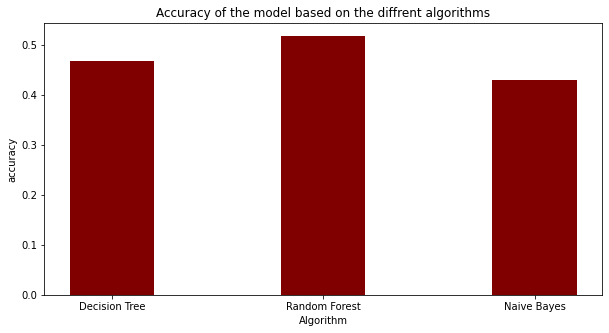

In [144]:
import numpy as np 
import matplotlib.pyplot as plt  
  
   
 
Tags = list(names) 
values = list(valid_scores) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(Tags, values, color ='maroon',  
        width = 0.4) 
  
plt.xlabel("Algorithm") 
plt.ylabel("accuracy") 
plt.title("Accuracy of the model based on the diffrent algorithms") 
plt.show() 


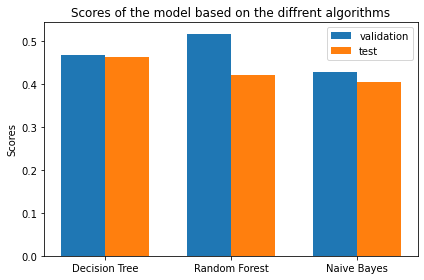

In [145]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = names


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, valid_scores, width, label='validation')
rects2 = ax.bar(x + width/2, day1_test_scores, width, label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of the model based on the diffrent algorithms')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')




fig.tight_layout()

plt.show()

In [147]:
#we Chose random forest based on the scores that we recived


In [149]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02 

names = [
         "Decision Tree", "Random Forest", "Naive Bayes"
         ]
classifiers = [
    
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=8, n_estimators=20, max_features=1),
    GaussianNB()
    ]
valid_scores14= []
day14_test_scores = []


 

for name, clf in zip(names, classifiers):
    
    clf.fit(train_vectors14.toarray(), data_train_cleaned14['Mylabel'])
    valid_scores14.append(clf.score(validate_vectors14.toarray(), data_validate_cleaned14['Mylabel']))
    day14_test_scores.append(clf.score(test_vectors14.toarray(), data_test_cleaned14['Mylabel']))

In [150]:
valid_scores14

[0.43066088840736727, 0.8694474539544963, 0.43391115926327195]

In [162]:
day14_test_scores

[0.527816411682893, 0.8350904033379692, 0.3337969401947149]

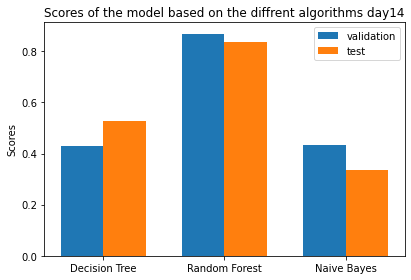

In [163]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = names


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, valid_scores14, width, label='validation')
rects2 = ax.bar(x + width/2, day14_test_scores, width, label='test')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Scores of the model based on the diffrent algorithms day14')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')




fig.tight_layout()

plt.show()